In [7]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from tqdm import tqdm 
tqdm.pandas()

import statsmodels.formula.api as smf
import numpy as np

from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:.2f}'.format

/Users/philip.ballentine/anaconda3/lib/python3.7/site-packages/tqdm/std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


## Import Mobility Data

In [8]:
combined = pd.read_csv(r"/Users/philip.ballentine/Documents/hia_covid_repo/hia_covid_data_assets/hia_covid_combined.csv", dtype={'County_FIPS': 'str'} )

In [9]:
combined['StateCD'] = combined['State Code'] 

In [10]:
combined.shape

(1011313, 69)

In [11]:
combined.County_FIPS.unique().shape

(3131,)

## County Population Descriptions 

In [12]:
countylevel = combined.groupby("County_FIPS").max()

In [13]:
countylevel.Population_ACS.describe()

count       3131.00
mean      101459.88
std       327673.58
min           74.00
25%        10948.50
50%        25687.00
75%        67058.50
max     10105722.00
Name: Population_ACS, dtype: float64

In [14]:
plt.style.use('fivethirtyeight')

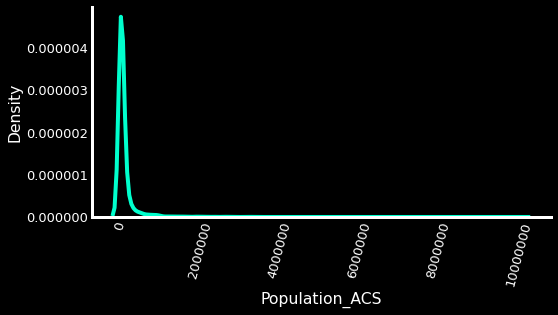

In [15]:
plt.rcParams.update({'font.size': 13})
plt.style.use("dark_background") 
sns.set_style({'axes.grid' : False})
sns.displot(countylevel.Population_ACS, height=4, aspect=1.8, color="#00ffcd", kind="kde")
plt.xticks(rotation=75)
plt.ticklabel_format(useOffset=False, style='plain')

## State Level Description of Deaths Per Capita on 2020-12-01

In [10]:
dec = combined[combined.Date == '2020-12-01']

In [11]:
statelevel = dec.groupby("StateCD").sum()

In [12]:
s2 = statelevel[['Deaths','Population_ACS']].reset_index()
s2['Deaths_PER_100K'] = s2['Deaths']/(s2['Population_ACS']/100000)
s2.sort_values(by="Deaths_PER_100K")

,StateCD,Deaths,Population_ACS,Deaths_PER_100K
45,VT,72,624636.00,11.53
20,ME,214,1330158.00,16.09
0,AK,122,737264.00,16.55
10,HI,242,1421572.00,17.02
43,UT,672,2993941.00,22.45
36,OR,936,4025127.00,23.25
46,WA,2802,7169967.00,39.08
49,WY,230,583200.00,39.44
29,NH,527,1331848.00,39.57
48,WV,758,1836843.00,41.27


## Yuma Example

In [20]:
yuma = combined[combined['locationcol'] == 'Yuma|Arizona']

In [21]:
yuma.columns

Index(['Unnamed: 0', 'Date', 'County_FIPS', 'State Code', 'Name',
       'retail_and_recreation_PCT_CFB', 'grocery_and_pharmacy_PCT_CFB',
       'parks_PCT_CFB', 'transit_stations_PCT_CFB', 'workplaces_PCT_CFB',
       'residential_PCT_CFB', 'retail_and_recreation_PCT_CFB_RollingAvg',
       'grocery_and_pharmacy_PCT_CFB_RollingAvg', 'parks_PCT_CFB_RollingAvg',
       'transit_stations_PCT_CFB_RollingAvg', 'workplaces_PCT_CFB_RollingAvg',
       'residential_PCT_CFB_RollingAvg', 'HS_DIPLOMA_ONLY_2018',
       'SOME_COLLEGE_2018', 'BACHELORS_PLUS_2018', 'Poverty_PCT_2018',
       'UrbanCD', 'Median_Income_2018', 'Population_ACS',
       'Population_Black_ACS', 'Population_Hisp_ACS', 'Population_Native_ACS',
       'PCT_Black_ACS', 'PCT_Hisp_ACS', 'PCT_Native_ACS',
       'UrbanCD_Description', 'Metro', 'State', 'Confirmed', 'Deaths',
       'Country/Region', 'Deaths_Previous', 'Confirmed_Previous', 'Deaths_New',
       'Deaths_New_7', 'Deaths_New_14', 'Deaths_New_21', 'Deaths_New_28',
 

In [22]:
sns.set(rc={'figure.figsize':(5,4)})

In [23]:
yuma1 = yuma[['Date','Deaths_New']]
yuma1.columns = ['Date','Deaths']
yuma1['Type'] = 'Deaths_New'

yuma2 = yuma[['Date','Deaths_New_RollingAvg']]
yuma2.columns = ['Date','Deaths']
yuma2['Type'] = 'Deaths_New_RollingAvg'

yuma3 = pd.concat([yuma1,yuma2])

/Users/philip.ballentine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/philip.ballentine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [24]:
yuma3

,Date,Deaths,Type
35207,2020-01-22,nan,Deaths_New
35208,2020-01-23,0.00,Deaths_New
35209,2020-01-24,0.00,Deaths_New
35210,2020-01-25,0.00,Deaths_New
35211,2020-01-26,0.00,Deaths_New
...,...,...,...
35525,2020-12-05,3.00,Deaths_New_RollingAvg
35526,2020-12-06,2.43,Deaths_New_RollingAvg
35527,2020-12-07,2.43,Deaths_New_RollingAvg
35528,2020-12-08,2.57,Deaths_New_RollingAvg


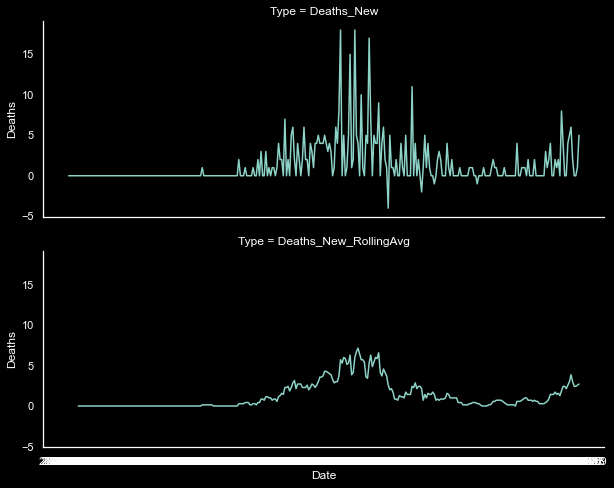

In [25]:
plt.rcParams.update({'font.size': 14})
plt.style.use("dark_background")
sns.set_style({'axes.grid' : False})
g = sns.FacetGrid(yuma3, row="Type",  height=3.5, aspect=2.5)
g.map(sns.lineplot, "Date", "Deaths")

In [51]:
def regress_two_var(df, X, Y, startdate = "2020-01-01", enddate = "2020-10-01"):
    # Cleaning up the dataframe
    df = df[df.Date >= startdate]
    df = df[df.Date <= enddate]
    df = df[df['{Y}'.format(Y=Y)].isna() == False]
    df = df[df['{X}'.format(X=X)].isna() == False]
    #dataframe["ratio"] = dataframe['{Y}'.format(Y=Y)]/dataframe['{X}'.format(X=X)]
    Xvar =  df['{X}'.format(X=X)].values.reshape(-1, 1) 
    Xvar1 = sm.add_constant(Xvar) # need to do this for statsmodels for some reason
    Yvar = df['{Y}'.format(Y=Y)].values.reshape(-1, 1) 
    mod = sm.OLS(endog=Yvar,exog=Xvar1)
    res = mod.fit()
    print(res.summary())
    # Graph the regression
    linear_regressor = LinearRegression()  # create object for the class
    fitted_model = linear_regressor.fit(X=Xvar,y=Yvar)  # perform linear regression
    Y_pred = fitted_model.predict(Xvar)  # make predictions
    #return fitted_model
    plt.figure(figsize=(7,7))
    plt.scatter(y=Yvar, x=Xvar)
    plt.plot(Xvar, Y_pred, color='red')
    plt.title("{X} on {Y} Regression".format(X=X,Y=Y))
    plt.show()
    #Scatterplot to show data
    #sns.scatterplot(y='{Y}'.format(Y=Y),x='{X}'.format(X=X), hue="Division", data=df)

In [52]:
combined_oneday = combined[combined['Date']=='2020-10-01']

In [53]:
combined_oneday.columns

Index(['Unnamed: 0', 'Date', 'County_FIPS', 'State Code', 'Name',
       'retail_and_recreation_PCT_CFB', 'grocery_and_pharmacy_PCT_CFB',
       'parks_PCT_CFB', 'transit_stations_PCT_CFB', 'workplaces_PCT_CFB',
       'residential_PCT_CFB', 'retail_and_recreation_PCT_CFB_RollingAvg',
       'grocery_and_pharmacy_PCT_CFB_RollingAvg', 'parks_PCT_CFB_RollingAvg',
       'transit_stations_PCT_CFB_RollingAvg', 'workplaces_PCT_CFB_RollingAvg',
       'residential_PCT_CFB_RollingAvg', 'HS_DIPLOMA_ONLY_2018',
       'SOME_COLLEGE_2018', 'BACHELORS_PLUS_2018', 'Poverty_PCT_2018',
       'UrbanCD', 'Median_Income_2018', 'Population_ACS',
       'Population_Black_ACS', 'Population_Hisp_ACS', 'Population_Native_ACS',
       'PCT_Black_ACS', 'PCT_Hisp_ACS', 'PCT_Native_ACS',
       'UrbanCD_Description', 'Metro', 'State', 'Confirmed', 'Deaths',
       'Country/Region', 'Deaths_Previous', 'Confirmed_Previous', 'Deaths_New',
       'Deaths_New_7', 'Deaths_New_14', 'Deaths_New_21', 'Deaths_New_28',
 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     4574.
Date:                Mon, 14 Dec 2020   Prob (F-statistic):               0.00
Time:                        10:25:36   Log-Likelihood:                -32886.
No. Observations:                3131   AIC:                         6.578e+04
Df Residuals:                    3129   BIC:                         6.579e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.914e+04    420.792    188.083      0.0

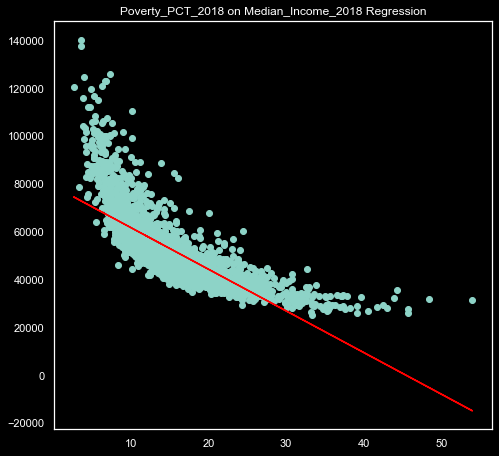

In [54]:
regress_two_var(df=combined_oneday,X="Poverty_PCT_2018",Y="Median_Income_2018")

In [46]:
def multivariate_ols(input_df, Y, Xlist):
    # Reshape the df to avoid NAs
    dataframe = input_df
    dataframe = dataframe[dataframe['{Y}'.format(Y=Y)].isna() == False]
    # Clean out any rows where one of these is NA -- can lead to data loss
    for i in Xlist:
        dataframe = dataframe[dataframe[i].isna() == False]
    # Check to ensure not too much thrown away
    pct_preserved = dataframe.shape[0]/input_df.shape[0]
    print("{pct} percent of the data preserved as non-NA".format(pct = 100*round(pct_preserved,2)))
    Xvar =  dataframe[Xlist]#.values.reshape(-1, len(Xlist)) 
    Xvar = sm.add_constant(Xvar)
    Yvar = dataframe['{Y}'.format(Y=Y)].values.reshape(-1, 1) 
    mod = sm.OLS(endog=Yvar,exog=Xvar,)
    res = mod.fit()
    print(res.summary())
    return res

In [221]:
Xlist = ['BACHELORS_PLUS_2018',"Poverty_PCT_2018", "Metro" ]

multivariate_ols(input_df=combined, Y="residential_PCT_CFB_RollingAvg", Xlist=Xlist)

23.0 percent of the data preserved as non-NA


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [27]:
combined.columns

Index(['Unnamed: 0', 'Date', 'County_FIPS', 'State Code', 'Name',
       'retail_and_recreation_PCT_CFB', 'grocery_and_pharmacy_PCT_CFB',
       'parks_PCT_CFB', 'transit_stations_PCT_CFB', 'workplaces_PCT_CFB',
       'residential_PCT_CFB', 'retail_and_recreation_PCT_CFB_RollingAvg',
       'grocery_and_pharmacy_PCT_CFB_RollingAvg', 'parks_PCT_CFB_RollingAvg',
       'transit_stations_PCT_CFB_RollingAvg', 'workplaces_PCT_CFB_RollingAvg',
       'residential_PCT_CFB_RollingAvg', 'HS_DIPLOMA_ONLY_2018',
       'SOME_COLLEGE_2018', 'BACHELORS_PLUS_2018', 'Poverty_PCT_2018',
       'UrbanCD', 'Median_Income_2018', 'Population_ACS',
       'Population_Black_ACS', 'Population_Hisp_ACS', 'Population_Native_ACS',
       'PCT_Black_ACS', 'PCT_Hisp_ACS', 'PCT_Native_ACS',
       'UrbanCD_Description', 'Metro', 'State', 'Confirmed', 'Deaths',
       'Country/Region', 'Deaths_Previous', 'Confirmed_Previous', 'Deaths_New',
       'Deaths_New_7', 'Deaths_New_14', 'Deaths_New_21', 'Deaths_New_28',
 

In [28]:
combined['StateCD'] = combined['State Code'] 

## Define list of all candidate predictors and then the possible outcomes

In [94]:
full_predictors = [
 'C(Metro)',
 #'HS_DIPLOMA_ONLY_2018',
 'PCT_Black_ACS',
 'BACHELORS_PLUS_2018',
 'Confirmed_New_RollingAvg_PER_100K',
 #'workplaces_PCT_CFB',
 'residential_PCT_CFB_RollingAvg',
 'Poverty_PCT_2018',
 'Median_Income_2018',
 #'C(Region)',
 'C(StateCD)',
    
]

Ylist = [#'Deaths_New_7_RollingAvg_PER_100K',
         #'Deaths_New_14_RollingAvg_PER_100K',
         #'Deaths_New_28_RollingAvg_PER_100K',
         #'Deaths_PER_100K'
         'Deaths_New_RollingAvg_PER_100K'
            ]

## Create list of formulas for all combinations

In [95]:
# https://stackoverflow.com/questions/1482308/how-to-get-all-subsets-of-a-set-powerset
from itertools import chain, combinations

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return set(chain.from_iterable(combinations(s, r) for r in range(len(s)+1)))

ps = powerset(full_predictors)
ps_list = [list(i) for i in ps]

In [96]:
textlist = []

for i in ps_list:
    text = '|'
    for x in i:
        text = text+' + '+x
    textlist.append(text)


textlist = [i.replace('| +','') for i in textlist if len(i) > 3]
    
full_form_list = []
for i in textlist:
    for y in Ylist:
        full_form_list.append(y+" ~ "+i)


full_form_list
samp_list = full_form_list[0:50]

In [97]:
len(full_form_list) # Number of the possible equations

255

## Define a Function for Formula-Based OLS

In [98]:
def start_end_mulivariate_ols(formulatxt, startdate="2020-06-01", enddate="2020-12-09", df=combined):
    segmented = df[df.Date > startdate]
    segmented = segmented[segmented.Date < enddate]
    mod = smf.ols(formula=formulatxt , data=segmented, missing='drop')
    res = mod.fit()
    #print(res.summary())
    return res

In [99]:
mod1 = start_end_mulivariate_ols(startdate = "2020-07-01", enddate = "2020-10-07", formulatxt="""
Deaths_PER_100K ~  residential_PCT_CFB_RollingAvg""")
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:        Deaths_PER_100K   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     3133.
Date:                Mon, 14 Dec 2020   Prob (F-statistic):               0.00
Time:                        11:03:28   Log-Likelihood:            -4.1965e+05
No. Observations:               81017   AIC:                         8.393e+05
Df Residuals:                   81015   BIC:                         8.393e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

## Test Formula for OLS

In [100]:
mod1 = start_end_mulivariate_ols(startdate = "2020-10-01", enddate = "2020-10-07", formulatxt="""
Deaths_New_RollingAvg_PER_100K ~ HS_DIPLOMA_ONLY_2018 + residential_PCT_CFB_RollingAvg +
Poverty_PCT_2018 + Median_Income_2018 + C(Region)""")

In [101]:
# Construct monthly daterange tuples

every_month = []
for i in range(4,9):
    a = '2020-0{c}-01'.format(c=i)
    b = '2020-0{c}-01'.format(c=i+1)
    every_month.append((a,b))
every_month.append(('2020-09-01','2020-10-01'))
every_month.append(('2020-10-01','2020-11-01'))
for i in range(10,12):
    a = '2020-{c}-01'.format(c=i)
    b = '2020-{c}-01'.format(c=i+1)
every_month.append((a,b))
every_month

[('2020-04-01', '2020-05-01'),
 ('2020-05-01', '2020-06-01'),
 ('2020-06-01', '2020-07-01'),
 ('2020-07-01', '2020-08-01'),
 ('2020-08-01', '2020-09-01'),
 ('2020-09-01', '2020-10-01'),
 ('2020-10-01', '2020-11-01'),
 ('2020-11-01', '2020-12-01')]

In [102]:
every_3month =[
 ('2020-04-01', '2020-07-01'),
 ('2020-05-01', '2020-08-01'),
 ('2020-06-01', '2020-09-01'),
 ('2020-07-01', '2020-10-01'),
 ('2020-08-01', '2020-11-01'),
 ('2020-09-01', '2020-12-01')
]


In [103]:
#dir(mod1)

## Function for running model and then graphing it over the different dateranges

In [104]:
def run_timeseries_models(formulatxt, list_dateranges, df):
    list_results = []
    for i in list_dateranges:
        res = start_end_mulivariate_ols(formulatxt = formulatxt, startdate = i[0], enddate = i[1], df=df)
        name = i[0]+"-"+i[1]
        list_results.append({"model":res,"start":i[0], "end":i[1]})
    
    resultslist = [{"bic":i['model'].bic, 
                    "aic":i['model'].aic, 
                    "start":i['start'], 
                    "end":i['end'], 
                    "r2_adj":i["model"].rsquared_adj,
                    "formula":formulatxt} for i in list_results]
    return pd.DataFrame.from_dict(resultslist)
    
    
    
    

In [105]:
formulatxt = "Deaths_New_21_RollingAvg_PER_100K ~  residential_PCT_CFB_RollingAvg + C(StateCD)"

df = run_timeseries_models(formulatxt=formulatxt, list_dateranges=every_month, df=combined)

In [106]:
df

,bic,aic,start,end,r2_adj,formula
0,27672.44,27267.95,2020-04-01,2020-05-01,0.50,Deaths_New_21_RollingAvg_PER_100K ~ residenti...
1,11521.31,11109.64,2020-05-01,2020-06-01,0.27,Deaths_New_21_RollingAvg_PER_100K ~ residenti...
2,9608.55,9194.51,2020-06-01,2020-07-01,0.23,Deaths_New_21_RollingAvg_PER_100K ~ residenti...
3,15090.70,14675.40,2020-07-01,2020-08-01,0.35,Deaths_New_21_RollingAvg_PER_100K ~ residenti...
4,13754.51,13331.99,2020-08-01,2020-09-01,0.22,Deaths_New_21_RollingAvg_PER_100K ~ residenti...
5,14643.36,14219.12,2020-09-01,2020-10-01,0.15,Deaths_New_21_RollingAvg_PER_100K ~ residenti...
6,41450.55,41014.98,2020-10-01,2020-11-01,0.16,Deaths_New_21_RollingAvg_PER_100K ~ residenti...
7,34925.92,34520.35,2020-11-01,2020-12-01,0.23,Deaths_New_21_RollingAvg_PER_100K ~ residenti...


## Run model and return dataframe showing the BIC, AIC, and R Squared

In [145]:
def graph_bic_adj2_TS(formulatxt, list_dateranges, df):
    df_graph = run_timeseries_models(formulatxt=formulatxt, list_dateranges=list_dateranges, df=df)
    plt.figure(figsize=(12,6))
    ax = sns.lineplot(x="start", y="bic", label="BIC", data=df_graph)
    plt.legend(loc="upper left")
    ax2 = ax.twinx()
    ax2 = sns.lineplot(x="start", y="r2_adj", label="R2_ADJ", color='red', data=df_graph)
    plt.title("BIC vs R2_ADJ")
    plt.legend(loc="upper right")
    print(formulatxt)
    print()

In [108]:
combined.columns

Index(['Unnamed: 0', 'Date', 'County_FIPS', 'State Code', 'Name',
       'retail_and_recreation_PCT_CFB', 'grocery_and_pharmacy_PCT_CFB',
       'parks_PCT_CFB', 'transit_stations_PCT_CFB', 'workplaces_PCT_CFB',
       'residential_PCT_CFB', 'retail_and_recreation_PCT_CFB_RollingAvg',
       'grocery_and_pharmacy_PCT_CFB_RollingAvg', 'parks_PCT_CFB_RollingAvg',
       'transit_stations_PCT_CFB_RollingAvg', 'workplaces_PCT_CFB_RollingAvg',
       'residential_PCT_CFB_RollingAvg', 'HS_DIPLOMA_ONLY_2018',
       'SOME_COLLEGE_2018', 'BACHELORS_PLUS_2018', 'Poverty_PCT_2018',
       'UrbanCD', 'Median_Income_2018', 'Population_ACS',
       'Population_Black_ACS', 'Population_Hisp_ACS', 'Population_Native_ACS',
       'PCT_Black_ACS', 'PCT_Hisp_ACS', 'PCT_Native_ACS',
       'UrbanCD_Description', 'Metro', 'State', 'Confirmed', 'Deaths',
       'Country/Region', 'Deaths_Previous', 'Confirmed_Previous', 'Deaths_New',
       'Deaths_New_7', 'Deaths_New_14', 'Deaths_New_21', 'Deaths_New_28',
 

In [223]:
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

residential_PCT_CFB_RollingAvg ~ Poverty_PCT_2018 + C(StateCD) + C(Metro) + Deaths_PER_100K



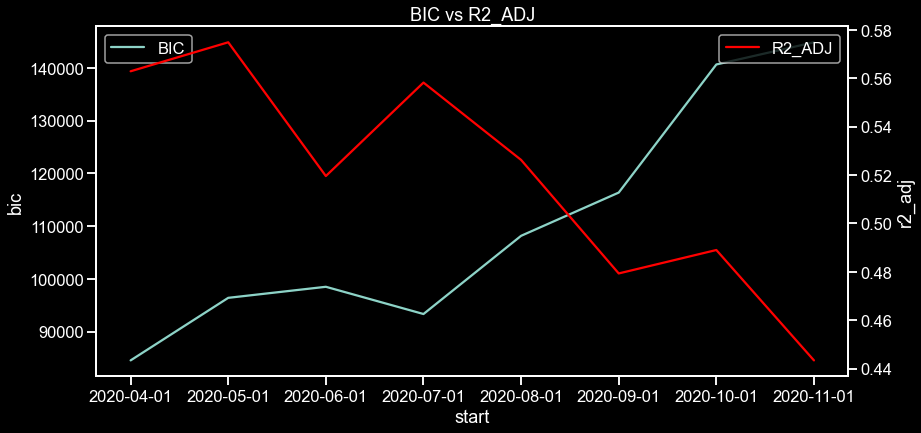

In [227]:
formula1 = """residential_PCT_CFB_RollingAvg ~ Poverty_PCT_2018 + C(StateCD) + C(Metro) + Deaths_PER_100K"""

graph_bic_adj2_TS(formulatxt=formula1, list_dateranges=every_month, df=combined)

In [228]:
mod1 = start_end_mulivariate_ols(startdate = "2020-06-01", enddate = "2020-12-01", formulatxt=formula1)
print(mod1.summary())

                                  OLS Regression Results                                  
Dep. Variable:     residential_PCT_CFB_RollingAvg   R-squared:                       0.394
Model:                                        OLS   Adj. R-squared:                  0.394
Method:                             Least Squares   F-statistic:                     1872.
Date:                            Mon, 14 Dec 2020   Prob (F-statistic):               0.00
Time:                                    17:05:19   Log-Likelihood:            -3.8459e+05
No. Observations:                          161394   AIC:                         7.693e+05
Df Residuals:                              161337   BIC:                         7.699e+05
Df Model:                                      56                                         
Covariance Type:                        nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      

Deaths_PER_100K ~ Poverty_PCT_2018 + C(StateCD) + PCT_Black_ACS + residential_PCT_CFB_RollingAvg + C(Metro)



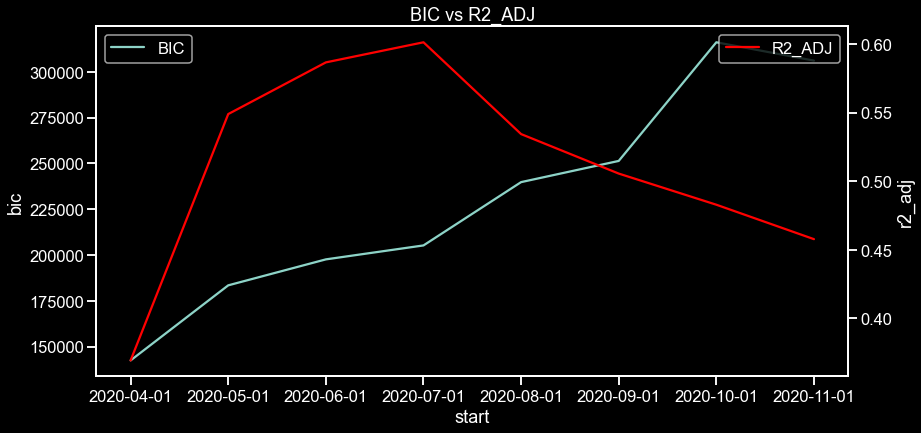

In [253]:
formula1 = """Deaths_PER_100K ~ Poverty_PCT_2018 + C(StateCD) + PCT_Black_ACS + residential_PCT_CFB_RollingAvg + C(Metro)"""

graph_bic_adj2_TS(formulatxt=formula1, list_dateranges=every_month, df=combined)

In [254]:
mod1 = start_end_mulivariate_ols(startdate = "2020-06-01", enddate = "2020-12-01", formulatxt=formula1)
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:        Deaths_PER_100K   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     2028.
Date:                Mon, 14 Dec 2020   Prob (F-statistic):               0.00
Time:                        17:43:52   Log-Likelihood:            -8.0348e+05
No. Observations:              161394   AIC:                         1.607e+06
Df Residuals:                  161336   BIC:                         1.608e+06
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

Deaths_New_RollingAvg_PER_100K ~ residential_PCT_CFB_RollingAvg + Poverty_PCT_2018 + StateCD



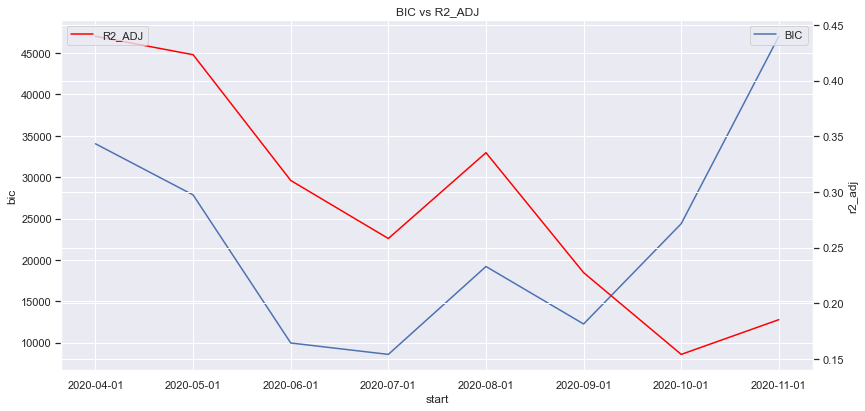

In [111]:
formula1 = """Deaths_New_RollingAvg_PER_100K ~ residential_PCT_CFB_RollingAvg + Poverty_PCT_2018 + StateCD"""

graph_bic_adj2_TS(formulatxt=formula1, list_dateranges=every_month, df=combined)

Deaths_New_RollingAvg_PER_100K ~ residential_PCT_CFB_RollingAvg + Poverty_PCT_2018 + Metro



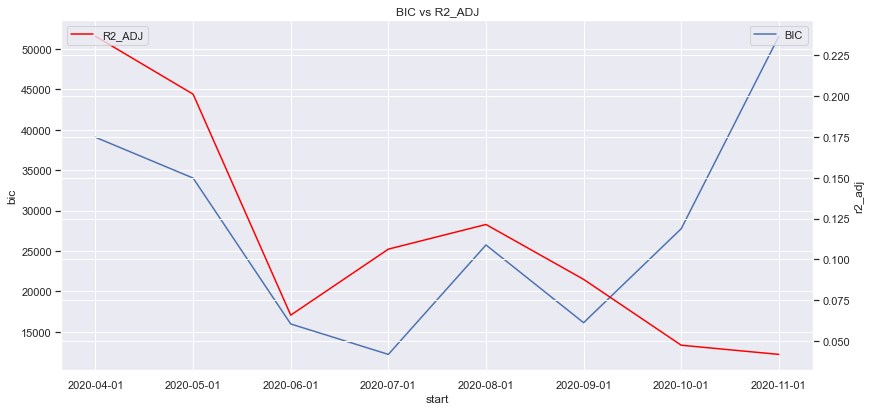

In [112]:
formula1 = """Deaths_New_RollingAvg_PER_100K ~ residential_PCT_CFB_RollingAvg + Poverty_PCT_2018 + Metro"""

graph_bic_adj2_TS(formulatxt=formula1, list_dateranges=every_month, df=combined)

## List of all possible formulas for OLS 

In [113]:
full_form_list[0:5]

['Deaths_New_RollingAvg_PER_100K ~  C(Metro) + PCT_Black_ACS + Confirmed_New_RollingAvg_PER_100K + residential_PCT_CFB_RollingAvg + Poverty_PCT_2018',
 'Deaths_New_RollingAvg_PER_100K ~  residential_PCT_CFB_RollingAvg + Poverty_PCT_2018 + Median_Income_2018 + C(StateCD)',
 'Deaths_New_RollingAvg_PER_100K ~  C(Metro) + PCT_Black_ACS + BACHELORS_PLUS_2018 + Poverty_PCT_2018 + Median_Income_2018',
 'Deaths_New_RollingAvg_PER_100K ~  BACHELORS_PLUS_2018 + residential_PCT_CFB_RollingAvg + Poverty_PCT_2018 + Median_Income_2018 + C(StateCD)',
 'Deaths_New_RollingAvg_PER_100K ~  PCT_Black_ACS + BACHELORS_PLUS_2018 + Confirmed_New_RollingAvg_PER_100K + residential_PCT_CFB_RollingAvg + Median_Income_2018 + C(StateCD)']

In [114]:
list_df = []
for i in tqdm(full_form_list):
    try:
        df = run_timeseries_models(formulatxt=i, list_dateranges=[('2020-06-01','2020-12-01')], df=combined)
        list_df.append(df)
    except:
        print("Error for {i}".format(i=i))

100%|██████████| 255/255 [13:07<00:00,  3.09s/it]


In [125]:
bigdf = pd.concat(list_df)

In [126]:
bigdf['num_var'] = bigdf['formula'].str.count('\+')+1

In [127]:
bigdf.formula.unique()

array(['Deaths_New_RollingAvg_PER_100K ~  C(Metro) + PCT_Black_ACS + Confirmed_New_RollingAvg_PER_100K + residential_PCT_CFB_RollingAvg + Poverty_PCT_2018',
       'Deaths_New_RollingAvg_PER_100K ~  residential_PCT_CFB_RollingAvg + Poverty_PCT_2018 + Median_Income_2018 + C(StateCD)',
       'Deaths_New_RollingAvg_PER_100K ~  C(Metro) + PCT_Black_ACS + BACHELORS_PLUS_2018 + Poverty_PCT_2018 + Median_Income_2018',
       'Deaths_New_RollingAvg_PER_100K ~  BACHELORS_PLUS_2018 + residential_PCT_CFB_RollingAvg + Poverty_PCT_2018 + Median_Income_2018 + C(StateCD)',
       'Deaths_New_RollingAvg_PER_100K ~  PCT_Black_ACS + BACHELORS_PLUS_2018 + Confirmed_New_RollingAvg_PER_100K + residential_PCT_CFB_RollingAvg + Median_Income_2018 + C(StateCD)',
       'Deaths_New_RollingAvg_PER_100K ~  C(Metro) + PCT_Black_ACS + residential_PCT_CFB_RollingAvg + C(StateCD)',
       'Deaths_New_RollingAvg_PER_100K ~  BACHELORS_PLUS_2018 + Poverty_PCT_2018',
       'Deaths_New_RollingAvg_PER_100K ~  PCT_Black_A

In [202]:
list_forms = list(bigdf.formula.unique())
list_forms =[i for i in list(bigdf['formula'].unique()) if "CFB" in i]


b = bigdf[bigdf.formula.isin(list_forms)].groupby("formula").mean().sort_values(by="num_var",ascending=False)
b[b.num_var == 3].sort_values(by="bic",ascending=True)

,bic,aic,r2_adj,num_var
formula,,,,
Deaths_PER_100K ~ residential_PCT_CFB_RollingAvg + Poverty_PCT_2018 + C(StateCD),1615174.33,1614644.77,0.39,3
Deaths_PER_100K ~ PCT_Black_ACS + residential_PCT_CFB_RollingAvg + C(StateCD),1620748.58,1620219.03,0.37,3
Deaths_PER_100K ~ Confirmed_New_RollingAvg_PER_100K + residential_PCT_CFB_RollingAvg + C(StateCD),1623725.15,1623195.59,0.36,3
Deaths_PER_100K ~ BACHELORS_PLUS_2018 + residential_PCT_CFB_RollingAvg + C(StateCD),1625185.09,1624655.54,0.35,3
Deaths_PER_100K ~ residential_PCT_CFB_RollingAvg + Median_Income_2018 + C(StateCD),1626405.78,1625876.23,0.35,3
Deaths_PER_100K ~ C(Metro) + residential_PCT_CFB_RollingAvg + C(StateCD),1626955.81,1626396.28,0.34,3
Deaths_PER_100K ~ C(Metro) + residential_PCT_CFB_RollingAvg + Poverty_PCT_2018,1673209.43,1673139.48,0.12,3
Deaths_PER_100K ~ residential_PCT_CFB_RollingAvg + Poverty_PCT_2018 + Median_Income_2018,1674222.63,1674182.67,0.12,3
Deaths_PER_100K ~ PCT_Black_ACS + residential_PCT_CFB_RollingAvg + Poverty_PCT_2018,1675988.82,1675948.85,0.11,3


Text(0.5, 1.0, 'Adjusted R Squared vs BIC')

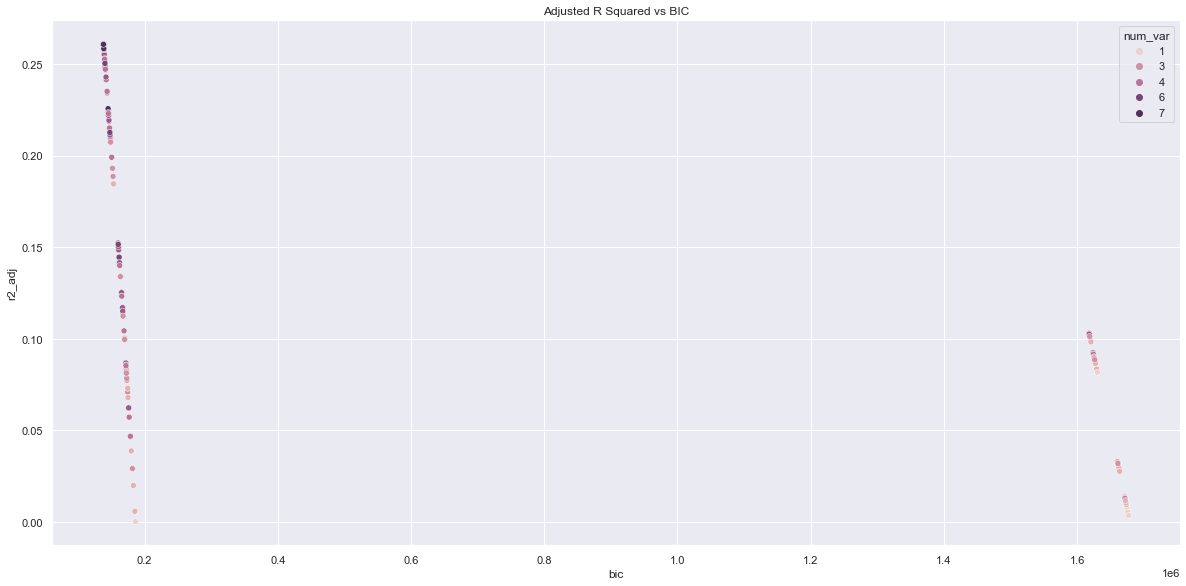

In [129]:
sns.set_style("darkgrid")
plt.figure(figsize=(18,9))
sns.scatterplot(y="r2_adj", x="bic", hue="num_var", data=bigdf)
plt.title("Adjusted R Squared vs BIC")


Deaths_New_RollingAvg_PER_100K ~ C(Metro) + BACHELORS_PLUS_2018 + residential_PCT_CFB_RollingAvg + C(StateCD)


                                  OLS Regression Results                                  
Dep. Variable:     Deaths_New_RollingAvg_PER_100K   R-squared:                       0.137
Model:                                        OLS   Adj. R-squared:                  0.136
Method:                             Least Squares   F-statistic:                     407.9
Date:                            Mon, 14 Dec 2020   Prob (F-statistic):               0.00
Time:                                    11:17:23   Log-Likelihood:                -60302.
No. Observations:                          144544   AIC:                         1.207e+05
Df Residuals:                              144487   BIC:                         1.213e+05
Df Model:                                      56                                         
Covariance Type:                        nonrobust                   

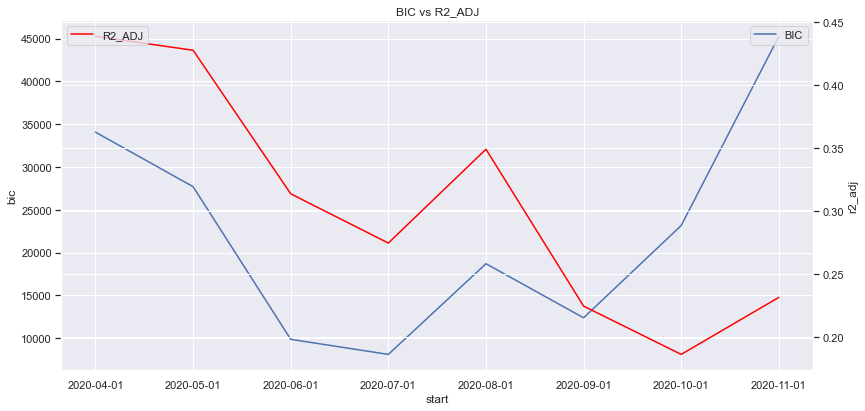

In [121]:
formula1 = """
Deaths_New_RollingAvg_PER_100K ~ C(Metro) + BACHELORS_PLUS_2018 + residential_PCT_CFB_RollingAvg + C(StateCD)
"""
graph_bic_adj2_TS(formulatxt=formula1, list_dateranges=every_month, df=combined)

mod2 = start_end_mulivariate_ols(formulatxt=formula1, startdate='2020-06-01', enddate='2020-11-15', df= combined)
print(mod2.summary())

Deaths_PER_100K ~ C(Metro) + PCT_Black_ACS + Poverty_PCT_2018 + C(StateCD)

                            OLS Regression Results                            
Dep. Variable:        Deaths_PER_100K   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     3852.
Date:                Mon, 14 Dec 2020   Prob (F-statistic):               0.00
Time:                        11:17:40   Log-Likelihood:            -2.6633e+06
No. Observations:              519746   AIC:                         5.327e+06
Df Residuals:                  519689   BIC:                         5.327e+06
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

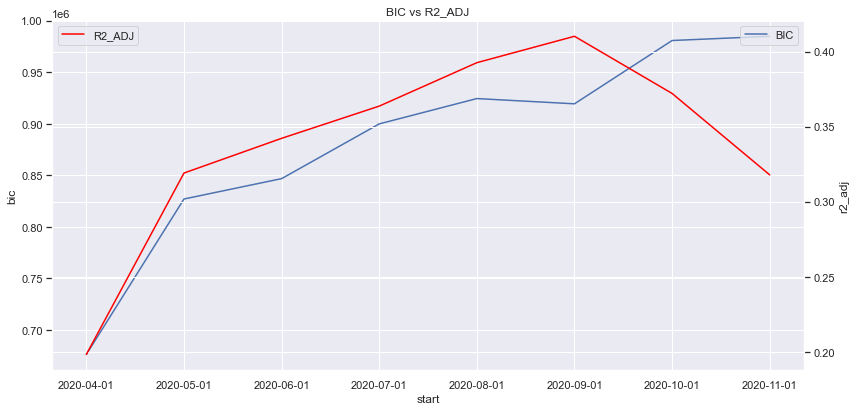

In [122]:
formula1 = """Deaths_PER_100K ~ C(Metro) + PCT_Black_ACS + Poverty_PCT_2018 + C(StateCD)"""
graph_bic_adj2_TS(formulatxt=formula1, list_dateranges=every_month, df=combined)

mod2 = start_end_mulivariate_ols(formulatxt=formula1, startdate='2020-06-01', enddate='2020-11-15', df= combined)
print(mod2.summary())

In [123]:
combined.columns

Index(['Unnamed: 0', 'Date', 'County_FIPS', 'State Code', 'Name',
       'retail_and_recreation_PCT_CFB', 'grocery_and_pharmacy_PCT_CFB',
       'parks_PCT_CFB', 'transit_stations_PCT_CFB', 'workplaces_PCT_CFB',
       'residential_PCT_CFB', 'retail_and_recreation_PCT_CFB_RollingAvg',
       'grocery_and_pharmacy_PCT_CFB_RollingAvg', 'parks_PCT_CFB_RollingAvg',
       'transit_stations_PCT_CFB_RollingAvg', 'workplaces_PCT_CFB_RollingAvg',
       'residential_PCT_CFB_RollingAvg', 'HS_DIPLOMA_ONLY_2018',
       'SOME_COLLEGE_2018', 'BACHELORS_PLUS_2018', 'Poverty_PCT_2018',
       'UrbanCD', 'Median_Income_2018', 'Population_ACS',
       'Population_Black_ACS', 'Population_Hisp_ACS', 'Population_Native_ACS',
       'PCT_Black_ACS', 'PCT_Hisp_ACS', 'PCT_Native_ACS',
       'UrbanCD_Description', 'Metro', 'State', 'Confirmed', 'Deaths',
       'Country/Region', 'Deaths_Previous', 'Confirmed_Previous', 'Deaths_New',
       'Deaths_New_7', 'Deaths_New_14', 'Deaths_New_21', 'Deaths_New_28',
 

## Detecting and managing Multicolinearity & VIF

In [81]:
#Sources: https://etav.github.io/python/vif_factor_python.html
        # https://www.sigmamagic.com/blogs/what-is-variance-inflation-factor/ 

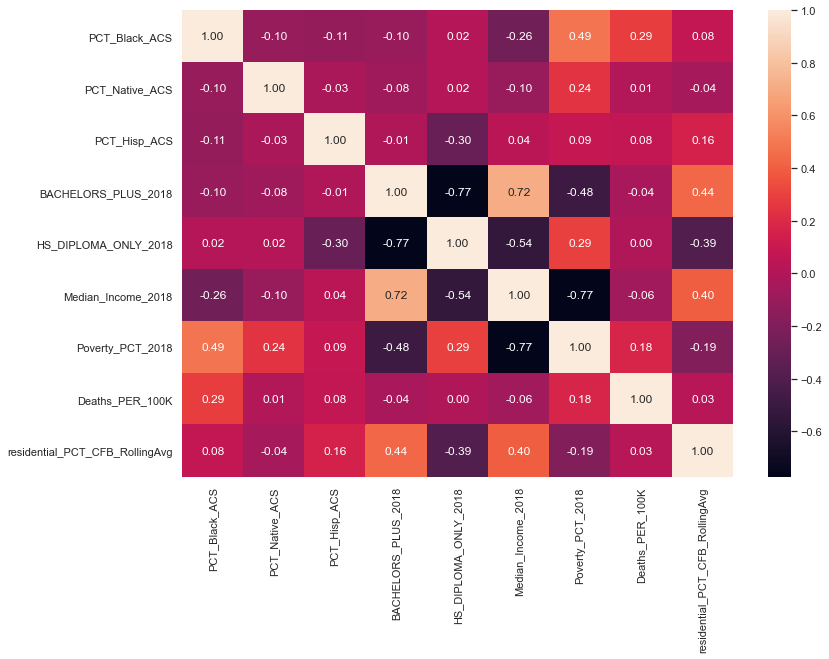

In [214]:
#https://etav.github.io/python/vif_factor_python.html

combined_1day = combined[combined.Date == "2020-10-08"]


cols_subset = ["Metro","PCT_Black_ACS",'PCT_Native_ACS',"PCT_Hisp_ACS", 
               "BACHELORS_PLUS_2018","HS_DIPLOMA_ONLY_2018", "Median_Income_2018",
               "Poverty_PCT_2018","Deaths_PER_100K", "StateCD", "Region", "residential_PCT_CFB_RollingAvg"
              ] 
combined_sub2 = combined[cols_subset]

sns.set(rc={'figure.figsize':(11,8)})
corr = combined_sub2.corr()
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

In [77]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [216]:
#combined_sub2_long = pd.get_dummies(combined_sub2, columns=["Metro","StateCD"])
()

list_col = list(cols_subset)
#list_col = [i for i in list_col if "Death" not in i and "RollingAvg" not in i]
#list_col.remove("State Code")
list_col.remove("Deaths_PER_100K")

features = "+".join(list_col)


y, X = dmatrices("Deaths_PER_100K ~"+features, combined_sub2, return_type='dataframe')

In [217]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

/Users/philip.ballentine/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/philip.ballentine/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [218]:
vifs = vif.round(1).sort_values(by="VIF Factor", ascending=False)

In [219]:
vifs[(vifs["features"].str.contains("State") == False) & (vifs["VIF Factor"] != np.inf)]

,VIF Factor,features
62,13.00,HS_DIPLOMA_ONLY_2018
61,12.70,BACHELORS_PLUS_2018
63,8.80,Median_Income_2018
64,5.40,Poverty_PCT_2018
60,3.10,PCT_Hisp_ACS
58,2.70,PCT_Black_ACS
4,2.10,Metro[T.Smaller_metro]
1,2.10,Metro[T.Micropolitan]
59,1.60,PCT_Native_ACS
65,1.40,residential_PCT_CFB_RollingAvg


## All subsets for county-level regressions

In [133]:
full_predictors = [
 'C(Metro)',
 'PCT_Black_ACS',
 'BACHELORS_PLUS_2018',
 'Confirmed_New_RollingAvg_PER_100K',
 'PCT_Hispanic_ACS',
 'PCT_Native_ACS',
 'Poverty_PCT_2018',
 'C(StateCD)',
    
]

Ylist = [#'Deaths_New_7_RollingAvg_PER_100K',
         #'Deaths_New_14_RollingAvg_PER_100K',
         #'Deaths_New_28_RollingAvg_PER_100K',
         'Deaths_PER_100K'
         #'Deaths_New_RollingAvg_PER_100K'
            ]

In [134]:
textlist = []

for i in ps_list:
    text = '|'
    for x in i:
        text = text+' + '+x
    textlist.append(text)


textlist = [i.replace('| +','') for i in textlist if len(i) > 3]
    
full_form_list = []
for i in textlist:
    for y in Ylist:
        full_form_list.append(y+" ~ "+i)


full_form_list
samp_list = full_form_list[0:50]

In [155]:
list_df = []
for i in tqdm(full_form_list):
    try:
        df = run_timeseries_models(formulatxt=i, list_dateranges=[('2020-04-01','2020-12-01')], df=combined)
        list_df.append(df)
    except:
        print("Error for {i}".format(i=i))

100%|██████████| 255/255 [16:16<00:00,  3.83s/it]


In [156]:
bigdf_county = pd.concat(list_df)
bigdf_county['num_var'] = bigdf_county['formula'].str.count('\+')+1

In [157]:
list_forms = list(bigdf_county.formula.unique())
list_forms =[i for i in list(bigdf_county['formula'].unique()) if "Confirmed" not in i and "CFB" not in i and "StateCD" not in i]


bigdf_county[bigdf_county.formula.isin(list_forms)].groupby("formula").mean().sort_values(by="r2_adj",ascending=False).head(30)

,bic,aic,r2_adj,num_var
formula,,,,
Deaths_PER_100K ~ C(Metro) + PCT_Black_ACS + BACHELORS_PLUS_2018 + Poverty_PCT_2018 + Median_Income_2018,7923254.19,7923150.31,0.14,5
Deaths_PER_100K ~ C(Metro) + PCT_Black_ACS + Poverty_PCT_2018 + Median_Income_2018,7924427.57,7924335.23,0.14,4
Deaths_PER_100K ~ PCT_Black_ACS + BACHELORS_PLUS_2018 + Poverty_PCT_2018 + Median_Income_2018,7925769.54,7925711.83,0.13,4
Deaths_PER_100K ~ PCT_Black_ACS + Poverty_PCT_2018 + Median_Income_2018,7927167.55,7927121.38,0.13,3
Deaths_PER_100K ~ C(Metro) + PCT_Black_ACS + BACHELORS_PLUS_2018 + Poverty_PCT_2018,7927431.59,7927339.25,0.13,4
Deaths_PER_100K ~ C(Metro) + PCT_Black_ACS + Poverty_PCT_2018,7927419.21,7927338.41,0.13,3
Deaths_PER_100K ~ C(Metro) + PCT_Black_ACS + BACHELORS_PLUS_2018 + Median_Income_2018,7931603.10,7931510.76,0.13,4
Deaths_PER_100K ~ C(Metro) + PCT_Black_ACS + BACHELORS_PLUS_2018,7931643.52,7931562.72,0.13,3
Deaths_PER_100K ~ C(Metro) + PCT_Black_ACS + Median_Income_2018,7932206.75,7932125.95,0.13,3


In [158]:
bigdf_county[bigdf_county.formula.isin(list_forms)].groupby("formula").mean().sort_values(by="bic",ascending=True).head(30)

,bic,aic,r2_adj,num_var
formula,,,,
Deaths_PER_100K ~ C(Metro) + PCT_Black_ACS + BACHELORS_PLUS_2018 + Poverty_PCT_2018 + Median_Income_2018,7923254.19,7923150.31,0.14,5
Deaths_PER_100K ~ C(Metro) + PCT_Black_ACS + Poverty_PCT_2018 + Median_Income_2018,7924427.57,7924335.23,0.14,4
Deaths_PER_100K ~ PCT_Black_ACS + BACHELORS_PLUS_2018 + Poverty_PCT_2018 + Median_Income_2018,7925769.54,7925711.83,0.13,4
Deaths_PER_100K ~ PCT_Black_ACS + Poverty_PCT_2018 + Median_Income_2018,7927167.55,7927121.38,0.13,3
Deaths_PER_100K ~ C(Metro) + PCT_Black_ACS + Poverty_PCT_2018,7927419.21,7927338.41,0.13,3
Deaths_PER_100K ~ C(Metro) + PCT_Black_ACS + BACHELORS_PLUS_2018 + Poverty_PCT_2018,7927431.59,7927339.25,0.13,4
Deaths_PER_100K ~ C(Metro) + PCT_Black_ACS + BACHELORS_PLUS_2018 + Median_Income_2018,7931603.10,7931510.76,0.13,4
Deaths_PER_100K ~ C(Metro) + PCT_Black_ACS + BACHELORS_PLUS_2018,7931643.52,7931562.72,0.13,3
Deaths_PER_100K ~ C(Metro) + PCT_Black_ACS + Median_Income_2018,7932206.75,7932125.95,0.13,3


In [159]:
full_predictors = [
 'C(Metro)',
 'PCT_Black_ACS',
 'BACHELORS_PLUS_2018',
 'Confirmed_New_RollingAvg_PER_100K',
 'PCT_Hispanic_ACS',
 'PCT_Native_ACS',
 'Poverty_PCT_2018',
 'C(StateCD)',
    
]

Ylist = [#'Deaths_New_7_RollingAvg_PER_100K',
         'Deaths_New_14_RollingAvg_PER_100K',
         #'Deaths_New_28_RollingAvg_PER_100K',
         #'Deaths_PER_100K'
         #'Deaths_New_RollingAvg_PER_100K'
            ]

textlist = []

for i in ps_list:
    text = '|'
    for x in i:
        text = text+' + '+x
    textlist.append(text)


textlist = [i.replace('| +','') for i in textlist if len(i) > 3]
    
full_form_list = []
for i in textlist:
    for y in Ylist:
        full_form_list.append(y+" ~ "+i)


list_df = []
for i in tqdm(full_form_list):
    try:
        df = run_timeseries_models(formulatxt=i, list_dateranges=[('2020-06-01','2020-12-01')], df=combined)
        list_df.append(df)
    except:
        print("Error for {i}".format(i=i))

100%|██████████| 255/255 [12:01<00:00,  2.83s/it]


In [160]:
bigdf_newdeath = pd.concat(list_df)
bigdf_newdeath['num_var'] = bigdf_newdeath['formula'].str.count('\+')+1

In [191]:
list_forms = list(bigdf_newdeath.formula.unique())
list_form = [i for i in list_forms if "CFB" not in i]
list_form = [i for i in list_forms if "CFB" not in i and "Confirmed" in i]
list_form

bigdf_newdeath[bigdf_newdeath.formula.isin(list_form) == True].groupby("formula").mean().sort_values(by="r2_adj",ascending=False).head(50)

,bic,aic,r2_adj,num_var
formula,,,,
Deaths_New_14_RollingAvg_PER_100K ~ C(Metro) + PCT_Black_ACS + BACHELORS_PLUS_2018 + Confirmed_New_RollingAvg_PER_100K + Poverty_PCT_2018 + Median_Income_2018 + C(StateCD),1660020.85,1659347.34,0.14,7
Deaths_New_14_RollingAvg_PER_100K ~ C(Metro) + PCT_Black_ACS + BACHELORS_PLUS_2018 + Confirmed_New_RollingAvg_PER_100K + Median_Income_2018 + C(StateCD),1660011.07,1659348.78,0.14,6
Deaths_New_14_RollingAvg_PER_100K ~ C(Metro) + BACHELORS_PLUS_2018 + Confirmed_New_RollingAvg_PER_100K + Poverty_PCT_2018 + Median_Income_2018 + C(StateCD),1660012.08,1659349.79,0.14,6
Deaths_New_14_RollingAvg_PER_100K ~ C(Metro) + BACHELORS_PLUS_2018 + Confirmed_New_RollingAvg_PER_100K + Median_Income_2018 + C(StateCD),1660006.61,1659355.55,0.14,5
Deaths_New_14_RollingAvg_PER_100K ~ C(Metro) + PCT_Black_ACS + BACHELORS_PLUS_2018 + Confirmed_New_RollingAvg_PER_100K + Poverty_PCT_2018 + C(StateCD),1660151.13,1659488.84,0.14,6
Deaths_New_14_RollingAvg_PER_100K ~ C(Metro) + BACHELORS_PLUS_2018 + Confirmed_New_RollingAvg_PER_100K + Poverty_PCT_2018 + C(StateCD),1660141.21,1659490.15,0.14,5
Deaths_New_14_RollingAvg_PER_100K ~ C(Metro) + PCT_Black_ACS + Confirmed_New_RollingAvg_PER_100K + Median_Income_2018 + C(StateCD),1660204.89,1659553.83,0.14,5
Deaths_New_14_RollingAvg_PER_100K ~ C(Metro) + Confirmed_New_RollingAvg_PER_100K + Median_Income_2018 + C(StateCD),1660192.77,1659552.93,0.14,4
Deaths_New_14_RollingAvg_PER_100K ~ C(Metro) + PCT_Black_ACS + Confirmed_New_RollingAvg_PER_100K + Poverty_PCT_2018 + Median_Income_2018 + C(StateCD),1660218.11,1659555.82,0.14,6


In [234]:
mod1 = start_end_mulivariate_ols(startdate = "2020-06-01", enddate = "2020-07-01", formulatxt="""
Deaths_New_21_RollingAvg_PER_100K ~  Confirmed_New_RollingAvg_PER_100K + StateCD + Metro""")
print(mod1.summary())

                                    OLS Regression Results                                   
Dep. Variable:     Deaths_New_21_RollingAvg_PER_100K   R-squared:                       0.112
Model:                                           OLS   Adj. R-squared:                  0.111
Method:                                Least Squares   F-statistic:                     250.1
Date:                               Mon, 14 Dec 2020   Prob (F-statistic):               0.00
Time:                                       17:19:50   Log-Likelihood:                -85111.
No. Observations:                             109585   AIC:                         1.703e+05
Df Residuals:                                 109529   BIC:                         1.709e+05
Df Model:                                         55                                         
Covariance Type:                           nonrobust                                         
                                        coef    std err     

In [240]:
mod1 = start_end_mulivariate_ols(startdate = "2020-04-01", enddate = "2020-06-01", formulatxt="""
Deaths_New_21_RollingAvg_PER_100K ~  Confirmed_New_RollingAvg_PER_100K + StateCD""")
print(mod1.summary())

                                    OLS Regression Results                                   
Dep. Variable:     Deaths_New_21_RollingAvg_PER_100K   R-squared:                       0.129
Model:                                           OLS   Adj. R-squared:                  0.128
Method:                                Least Squares   F-statistic:                     543.5
Date:                               Mon, 14 Dec 2020   Prob (F-statistic):               0.00
Time:                                       17:23:06   Log-Likelihood:            -1.7072e+05
No. Observations:                             187860   AIC:                         3.416e+05
Df Residuals:                                 187808   BIC:                         3.421e+05
Df Model:                                         51                                         
Covariance Type:                           nonrobust                                         
                                        coef    std err     

In [239]:
mod1 = start_end_mulivariate_ols(startdate = "2020-06-01", enddate = "2020-09-01", formulatxt="""
Deaths_New_21_RollingAvg_PER_100K ~  Confirmed_New_RollingAvg_PER_100K + StateCD""")
print(mod1.summary())

                                    OLS Regression Results                                   
Dep. Variable:     Deaths_New_21_RollingAvg_PER_100K   R-squared:                       0.112
Model:                                           OLS   Adj. R-squared:                  0.112
Method:                                Least Squares   F-statistic:                     706.8
Date:                               Mon, 14 Dec 2020   Prob (F-statistic):               0.00
Time:                                       17:22:48   Log-Likelihood:            -3.1652e+05
No. Observations:                             284921   AIC:                         6.331e+05
Df Residuals:                                 284869   BIC:                         6.337e+05
Df Model:                                         51                                         
Covariance Type:                           nonrobust                                         
                                        coef    std err     

In [243]:
mod1 = start_end_mulivariate_ols(startdate = "2020-10-01", enddate = "2020-12-01", formulatxt="""
Deaths_New_14_RollingAvg_PER_100K ~  Confirmed_New_RollingAvg_PER_100K + StateCD""")
print(mod1.summary())

                                    OLS Regression Results                                   
Dep. Variable:     Deaths_New_14_RollingAvg_PER_100K   R-squared:                       0.132
Model:                                           OLS   Adj. R-squared:                  0.132
Method:                                Least Squares   F-statistic:                     512.6
Date:                               Mon, 14 Dec 2020   Prob (F-statistic):               0.00
Time:                                       17:23:58   Log-Likelihood:            -3.2102e+05
No. Observations:                             172205   AIC:                         6.421e+05
Df Residuals:                                 172153   BIC:                         6.427e+05
Df Model:                                         51                                         
Covariance Type:                           nonrobust                                         
                                        coef    std err     

In [252]:
mod1 = start_end_mulivariate_ols(startdate = "2020-10-01", enddate = "2020-12-01", formulatxt="""
Deaths_New_14_RollingAvg_PER_100K ~  Confirmed_New_RollingAvg_PER_100K """)
print(mod1.summary())

                                    OLS Regression Results                                   
Dep. Variable:     Deaths_New_14_RollingAvg_PER_100K   R-squared:                       0.109
Model:                                           OLS   Adj. R-squared:                  0.109
Method:                                Least Squares   F-statistic:                 2.103e+04
Date:                               Mon, 14 Dec 2020   Prob (F-statistic):               0.00
Time:                                       17:27:35   Log-Likelihood:            -3.2327e+05
No. Observations:                             172205   AIC:                         6.465e+05
Df Residuals:                                 172203   BIC:                         6.466e+05
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
                                        coef    std err     